# Ejercicio 1  Sklearn 

- Modelo : regresión lineal +
- Set  con 2 valiables y 14170 entradas 
- https://koldopina.com/regresion-lineal-simple/

# %matplotlib inline

#### Importamos las librerías necesarias y obtenemos los datos que vamos a necesitar para nuestro modelo de regresión lineal simple

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import random
import math

#### Tranforma los datoa dataframe

In [29]:
slr_df = pd.read_csv('data_LR.csv', sep="|")
slr_df = slr_df.replace(',','.', regex=True).astype(float)

In [20]:
slr_df.head()

,OUTDOOR_TEMP,ELECTRIC_POWER
0,30.248541,NaN
1,31.321108,324.54
2,32.704262,NaN
3,24.938467,252.70
4,33.316906,331.10


In [21]:
slr_df.describe()

,OUTDOOR_TEMP,ELECTRIC_POWER
count,1496.000000,1494.000000
mean,28.544429,286.214465
std,6.364375,41.516466
min,0.000000,0.000000
25%,26.204395,261.550000
50%,29.232194,288.620000
75%,32.470816,315.852500
max,38.310135,391.710000


In [22]:
slr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496 entries, 0 to 1495
Data columns (total 2 columns):
OUTDOOR_TEMP      1496 non-null float64
ELECTRIC_POWER    1494 non-null float64
dtypes: float64(2)
memory usage: 23.5 KB


In [31]:
print('NULL VALUES !')
slr_df.isnull().sum()

NULL VALUES !


OUTDOOR_TEMP      0
ELECTRIC_POWER    2
dtype: int64

#### Eliminar valores null 


In [33]:
slr_df = slr_df.dropna()
slr_df.isnull().sum()

OUTDOOR_TEMP      0
ELECTRIC_POWER    0
dtype: int64

####  Exoploracion de datos 

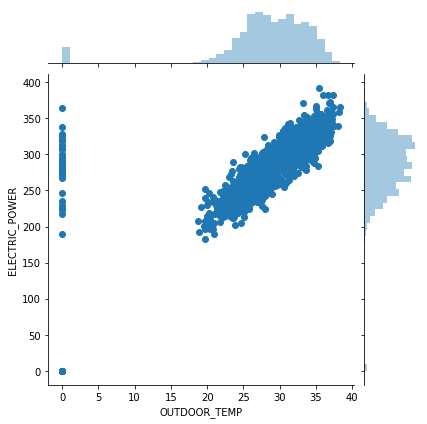

In [34]:
sns.jointplot(data = slr_df, x = 'OUTDOOR_TEMP', y ='ELECTRIC_POWER')

Notamos la precencia de un conjunto menor de datos y que corresponden a medidas erroneas del medidor. Es necesario elemiinarlos del set antes de continuar con el netrenamoento del modelo .

In [35]:
# Reescribe el dataframe con una seleccion de valores deistontos a 0 
slr_df = slr_df[slr_df.OUTDOOR_TEMP != 0] 

#### So much better 

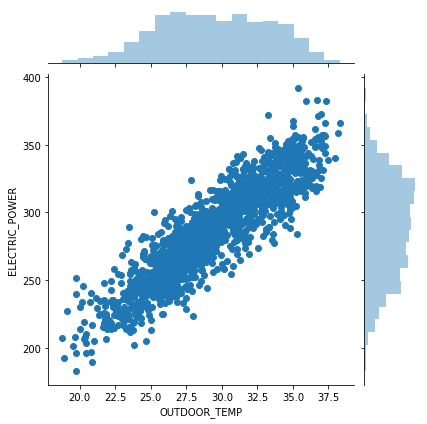

In [36]:
#Visualizamos nuevamente los datos 
sns.jointplot(data = slr_df, x = 'OUTDOOR_TEMP', y ='ELECTRIC_POWER')

#### Algo de challa 

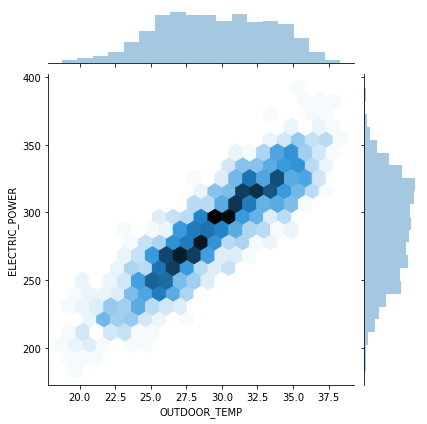

In [37]:
sns.jointplot(data = slr_df, x = 'OUTDOOR_TEMP', y ='ELECTRIC_POWER', kind = 'hex')

# Correlograma !

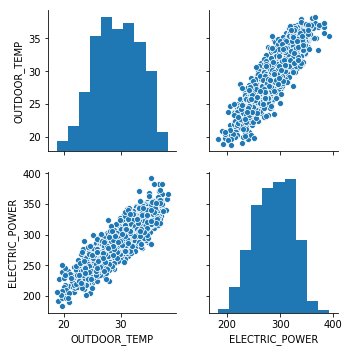

In [38]:
sns.pairplot(slr_df)

#### Nuve de puntos con su regresión lineal marcada

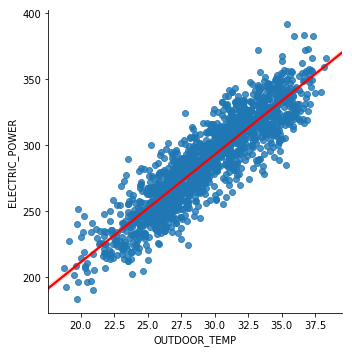

In [40]:
sns.lmplot(data = slr_df, x = 'OUTDOOR_TEMP', y ='ELECTRIC_POWER' ,  line_kws={'color': 'red'})

## Preparamos los datos para el modelo

#### Creamos 2 variables con los valores de la variables respectivas

In [43]:
X = slr_df['OUTDOOR_TEMP'].values.reshape(-1,1)
y = slr_df['ELECTRIC_POWER'].values.reshape(-1,1)

#### Creamos los datos de entrenamineto y validación con ayuda de la función train_test_split del modulo model_seleccion de sklearn

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=10)

## Creacion del modelo 
Se usara el modelo LinearRegression del lineal_model

In [46]:
lm = LinearRegression()

In [55]:
 X_train.size

1014

In [56]:
y_train.size

1014

## Entrenamiento 

In [59]:
lm.fit(X_train , y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Obtenemos el termino independiente y su pendiente

In [60]:
intercept = lm.intercept_
slope = lm.coef_
print ('La recta de regresión es: y = %f + %f * X'%(lm.intercept_, slope))

La recta de regresión es: y = 48.078355 + 8.149359 * X


## Predicción con los datos de validación

In [61]:
valores_estimados = lm.predict(X_test)

 ## De forma gráfica la prediccion

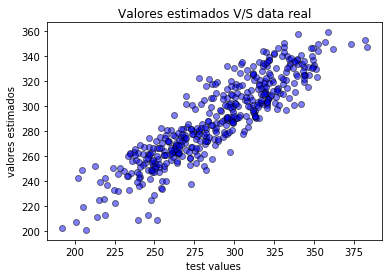

In [84]:
plt.scatter(y_test , valores_estimados  , c='b' , edgecolors=(0,0,0) , alpha = 0.5)
plt.title('Valores estimados V/S data real')
plt.xlabel('test values ')
plt.ylabel('valores estimados')
plt.show()





In [78]:
#datos  = pd.DataFrame({'x':valores_estimados , 'y':y_test  })
#datos
#sns.lmplot(data =   x = valores_estimados , y = y_test    ,  line_kws={'color': 'red'})

## Historigrama de los valores estimados , supone una distribución normal


Se restan los  valores reales  de los valores estimados para visualizar su distrubucion, no es  perfecto pero es aceptable.

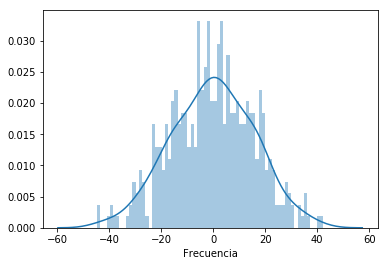

In [82]:
sns.distplot((y_test - valores_estimados), bins = 70)
plt.xlabel('Delta de estimación')
plt.xlabel('Frecuencia')
plt.show()